**Академия аналитиков Авито**

📊 Эксперименты. Занятие 3-4. Способы снижения дисперсии

## Содержание темы:
> * [Введение](#Введение)
> * [Причины возникновения дисперсии](#Причины-возникновения-дисперсии)
> * [CUPED](#CUPED)
> * [Стратификация](#Стратификация)
> * [Выводы](#Выводы)

💫 **Теги:**  дисперсия, чувствительность, CUPED, стратификация.

In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

## Введение

Количественные эксперименты — это основа для принятия решений во многих технологических компаниях. Часто мы проводим эксперименты на недостаточно чувствительных к различиям бизнес-метриках. Это может приводить к принятию неоптимальных решений и сильно влиять на прибыль.  

👉 Есть три способа повысить чувствительность контролируемых экспериментов:  
1) увеличение размеров выборки в экспериментах,  
2) планирование изменений продукта, которые приводят к большим различиям в бизнес-метриках,  
3) уменьшение дисперсии выборки бизнес-метрик.  

Самый простой способ повысить чувствительность — увеличить размер образца. Но это не всегда помогает по разным причинам:  
- часто изменения продукта, которые мы проверяем в эксперименте, затрагивают лишь небольшую часть пользовательской базы, что ограничивает размеры выборки;  
- такие компании, как Авито, проводят несколько сотен экспериментов в год. Когда некоторые эксперименты пересекаются друг с другом, доступных пользователей для каждого эксперимента может стать мало. По этим причинам часто невозможно увеличить количество пользователей, участвующих в эксперименте.

💬 Использовать второй способ тоже могут не все: у крупных компаний даже небольшой сдвиг ключевой метрики дает ощутимое увеличение прибыли, поэтому от таких экспериментов нельзя отказываться. Тем более, что низковисящие фрукты, как правило, давно собраны.  
Именно из-за этого важно находить способы проводить более чувствительные эксперименты, используя то же или меньшее количество пользователей. Уменьшение дисперсии как раз позволяет это делать.

Рассмотрим методики, использование которых позволит снизить дисперсию выборок в ваших экспериментах, что приведёт к повышению их чувствительности.


## Причины возникновения дисперсии

Под дисперсией мы подразумеваем **разброс наших измерений** (отклонение от среднего).  
Дисперсию формирует множество факторов, часть их которых мы не можем объяснить в наших данных, а часть имеют вполне логичное обоснование. 

📊 **Примеры предсказуемой дисперсии:**  

1) Пользователь, который раньше много тратил на ваши продукты выше среднего, с большей вероятностью и сейчас тратит на них так же. Таким образом, мы можем в выборке для некоторых её элементов объяснить причины значительного их отклонения от среднего.  
  >На Авито можно встретить явно такую зависимость, например, в таком случае:   
*Крупное агентство недвижимости всегда тратило больше, чем небольшое, и на временном горизонте в несколько месяцев это различие обычно сохраняется.*  

2) Можно объяснять дисперсию историческими зависимостями, только если у данных есть выраженная сезонность. Стоит делать это с большой осторожностью в те периоды, когда поведение резко меняется (COVID или в праздничные периоды, например).
Использование такого рода зависимостей мы рассмотрим в рамках методологии CUPED.

3) Помимо историчности данных, мы можем выделить категориальные факторы, когда внутри выборки или сегмента на самом деле есть отдельные подсегменты, которые отличаются по поведению.  

Например, в Авито это пользователи, которые по-разному ищут товары:   
* составляют сфокусированный или размытый запрос — результаты они тоже получают разные; 
* просто пользователи из разных вертикалей;
* паттерны поведения пользователей из больших городов могут отличаться от пользователей из малых населённых пунктов.


Также остаются такие факторы, как погрешность измерений или случайные факторы, которые мы не можем объяснить. Повлиять на них можно, только увеличивая объём выборки или длину теста. Шум мы предсказать не можем, но очень часто оказывается, что его влияние меньше, чем у остальных факторов. 

При этом знания о других факторах мы можем использовать для снижения дисперсии.  
Исключение — аномальные периоды. Одиночные исторические зависимости также переходят в категорию шума.

## CUPED

**CUPED (control upper pre experimented data)** — методика, предложенная аналитической командой Microsoft.  
Используется Amazon, eBay, Facebook, Google, Microsoft, Yahoo, Zynga, Netflix.  

Используя CUPED, мы учитываем уже **существующие данные** о поведении пользователя до эксперимента, чтобы **снизить дисперсию метрики и повысить чувствительность**.  
👉 Это позволяет получить тот же уровень статистической мощности при уменьшении размера выборки почти в два раза.


Вместо исходной метрики вводим новую CUPED-метрику. Рассмотрим, как новая метрика приводит к снижению дисперсии.

> 💬 Метод имеет немного условий для его применения.  

**1. Допустим, у нас есть две случайных величины $Y$ и $X$.**  

$Х$ — это случайная величина до начала эксперимента (то, что $Х$ берется из данных до эксперимента важно, т.к. именно поэтому мы можем вычислить среднее от $Х$),   
$У$ — после запуска эксперимента. 
Также есть параметр $\theta$, с помощью которого мы можем ввести следующее распределение:  

$Y_{CUPED}=Y-\theta(X-\overline X)$


**2. Найдем дисперсию нашей метрики:**  

$var_{srs}(Y_{CUPED})=var_{srs}(Y)+\theta^2var_{srs}(X)-2\theta cov_{srs}(X,Y)$

Задача сводится к тому, что мы хотим снизить дисперсию нашего распределения $Y_{CUPED}$.   

**4. Подберем такой параметр $\theta$, чтобы дисперсия была минимальна.**    

💬 Дисперсия — это квадратичная функция относительно $\theta$ (то есть парабола, у которой ветви направлены вверх). Мы берем производную дисперсии по $\theta$ и приравниваем к нулю. Таким образом, мы получим значение $\theta_{optimal}$, при котором дисперсия будет минимальна (нижнюю точку параболы): 

$\theta_{optimal}=cov_{srs}(X,Y)/var_{srs}(X)$

**4. Подставим оптимальное значение $\theta$ в формулу дисперсии:**

$var_{srs}{(Y_{CUPED})}_{min}=var_{srs}(Y)(1-\rho^2),\;\rho=corr_{srs}(X,Y)$

👉 Множитель $(1-\rho^2)$ говорит о том, что чем сильнее корреляция между $Х$ и $У$ (то есть чем лучше исторические данные предсказывают будущие), тем больше слагаемое $\rho^2$ — тем сильнее удается снизить дисперсию в результате CUPED. 
___
Выше мы провели математические преобразования, используя лишь основы теории вероятности. Добавим контекста из аналитики.   
$Y$ — это наша основная выборка, которую мы получили по результатам эксперимента.  
$X$ — это некоторая выборка по тем же экспериментальным единицам (например, по тем же самым пользователям, которая была получена до эксперимента).    

При этом для того, чтобы методика работала, вообще не обязательно, чтобы $X$ и $Y$ были связаны.  
* Если они не связаны $(\rho=0)$, то метрика CUPED превращается в исходную метрику (имеет такую же дисперсию, то есть мы не получаем никакой пользы).  
* Чем больше $X$ и $Y$ связаны, тем больше снижается дисперсия. Даже если это разные показатели. Мы можем использовать (для $X$) в метрике CUPED как прошлые значения того же показателя $Y$, так и любой другой показатель. 

На практике получается хорошо связывать расходы пользователей или количество размещаемых объявлений из периода до с периодом после. Этот метод также даёт простор для формирования метрик на основе машинного обучения (выбирая $X$, мы по сути решаем задачу предсказания $Y$ на основе данных из предыдущих периодов).


💬 Если по элементам из $Y$ (например, пользователям), нет исторических данных в $X$, то мы просто ставим 0.

В тех случаях, когда мы вносим сильное изменение и исторические данные будут плохо предсказывать тестовые данные, в качестве $Х$ и $У$ берем именно совокупные данные теста и контроля. Чем сильнее изменение, тем меньше будет корреляция $Х$ и $У$, и тем меньше снижение дисперсии. 
Если изменения сильные, то **Т-тест** и на исходной выборке покажет значимые отличия. А вот для более слабых изменений мы можем применить Т-тест не напрямую, а на метрику CUPED. Поскольку изменение слабое, то корреляция $Х$ и $У$ будет присутствовать, что снизит дисперсию. При этом на выборке с меньшей дисперсией Т-тест будет иметь большую мощность (с большей вероятностью сможем найти значимое отличие).

>📌 Нужно сначала найти метрику, которая хорошо скоррелирована, а только потом применять метод CUPED.

Рассмотрим пример применения CUPED для реальных результатов AB-теста.

Загружаем данные эксперимента:

In [15]:
data_test=pd.read_csv('promt_test.csv')

In [16]:
data_test

,test_group,user_bucket,revenue,pre_revenue
0,control,0.0,1.541235e+06,2.431853e+06
1,control,1.0,1.540157e+06,2.567391e+06
2,control,2.0,1.658264e+06,2.568697e+06
3,control,3.0,2.007450e+06,2.962268e+06
4,control,4.0,1.976987e+06,2.910092e+06
...,...,...,...,...
145,new_lk_rec,45.0,1.991105e+06,3.182075e+06
146,new_lk_rec,46.0,1.858896e+06,2.726123e+06
147,new_lk_rec,47.0,1.695438e+06,2.564411e+06
148,new_lk_rec,48.0,1.710189e+06,3.066091e+06


In [17]:
data_test[data_test['test_group'] == 'new_lk_rec'].shape

(50, 4)

Считаем среднее предданных:

In [18]:
data_test['pre_revenue_tg_average']=data_test.pre_revenue.mean() 

Считаем множитель для CUPED: 

In [19]:
data_test.revenue.shape

(150,)

In [20]:
data_test.pre_revenue.shape

(150,)

In [21]:
teta = np.cov(data_test.revenue,data_test.pre_revenue, ddof=1)[1,0]/np.var(data_test.pre_revenue, ddof=1)

In [22]:
corr = np.corrcoef(data_test.revenue,data_test.pre_revenue)[1,0] 

Считаем CUPED-метрику:

In [23]:
data_test['cuped_revenue'] = data_test.revenue - teta * (data_test.pre_revenue - data_test.pre_revenue_tg_average)

Считаем дисперсию разности средних для обычной и CUPED-метрики.  
Оцениваем теоретическое значение для CUPED дисперсии и посчитанное на реальных данных.

In [24]:
std_total=(data_test.groupby(['test_group'])['revenue'].var(ddof=1)[0]/50+data_test.groupby(['test_group'])['revenue'].var(ddof=1)[1]/50)**0.5

In [25]:
std_cuped=std_total*(1-corr**2)**0.5

In [26]:
(data_test.groupby(['test_group'])['cuped_revenue'].var(ddof=1)[0]/50+data_test.groupby(['test_group'])['cuped_revenue'].var(ddof=1)[1]/50)**0.5

24041.778158869776

In [27]:
std_cuped

23539.84378394034

Дисперсия для CUPED-метрики похожа при теоретическом расчете и для реальных данных. А вот дисперсия обычной метрики значительно выше.

In [28]:
std_total

46315.23775108171

In [29]:
np.std(data_test['cuped_revenue'], ddof=1)

116898.28643690675

In [30]:
np.std(data_test['revenue'], ddof=1) / 50

4600.006676945849

Сравним результаты применения t-теста к обычной и CUPED-метрике.

In [27]:
stats.ttest_ind(data_test[(data_test.test_group=='new_lk')].revenue,data_test[(data_test.test_group=='control')].revenue,equal_var = False)

Ttest_indResult(statistic=-0.7629734809218813, pvalue=0.4474961962789541)

Результат t-теста к CUPED метрике:

In [28]:
stats.ttest_ind(data_test[(data_test.test_group=='new_lk')].cuped_revenue,data_test[(data_test.test_group=='control')].cuped_revenue,equal_var = False)


Ttest_indResult(statistic=-2.882124337332291, pvalue=0.004883185468346531)

Видно, что p-value значительно ниже 1%, а значит, мы отклонить гипотезу о равенстве средних этих выборок.

Рассмотрим другую группу new_lk_rec. Ее среднее немного больше, чем в контроле.

In [31]:
stats.ttest_ind(data_test[(data_test.test_group=='new_lk_rec')].revenue,data_test[(data_test.test_group=='control')].revenue,equal_var = False)

Ttest_indResult(statistic=0.8804806811048778, pvalue=0.38081302386744664)

In [32]:
stats.ttest_ind(data_test[(data_test.test_group=='new_lk_rec')].cuped_revenue,data_test[(data_test.test_group=='control')].cuped_revenue,equal_var = False)

Ttest_indResult(statistic=-1.5816595073366941, pvalue=0.11696897103008692)

☝️ Видно, что p-value здесь больше — значит, мы не отвергаем гипотезу о равенстве средних этих выборок.

Проверим валидность применения CUPED-метрики.  
Можем наблюдать, что и CUPED-метрика тоже возвращает равномерное распределение p-value в тестовом стенде.

In [10]:
usual_metric=[]
cuped_metric=[]
corr=[]
pp=[]

for i in range(10000):
    px1=np.random.normal(100,4,50) # предметрики
    px2=np.random.normal(100,4,50)
    x1 = px1*0.5 + np.random.normal(0,4,50) # метрики после + добавили шумы (нормально распределенные)
    x2 = px2*0.5 + np.random.normal(0,4,50)
    x=np.concatenate([x1,x2])
    px=np.concatenate([px1,px2])
    teta = np.cov(x,px, ddof=1)[1,0]/px.var(ddof=1) # строим тету
    cuped_x1=x1-teta*(px1-px.mean()) 
    cuped_x2=x2-teta*(px2-px.mean())

    '''
    print('*')
    print(stats.ttest_ind(x1,x2,equal_var = False))
    print(stats.ttest_ind(cuped_x1,cuped_x2,equal_var = False))'''
    
    #print(stats.ttest_ind(x1,x2,equal_var = False)[1]/stats.ttest_ind(cuped_x1,cuped_x2,equal_var = False)[1])
    
     #stats.ttest_ind(x1,x2,equal_var = False)[1]/
    if stats.ttest_ind(px1,px2,equal_var = False)[1]>=0.05 or True:
        usual_metric.append(stats.ttest_ind(x1,x2,equal_var = False)[1])
        cuped_metric.append(stats.ttest_ind(cuped_x1,cuped_x2,equal_var = False)[1])
    pp.append(stats.ttest_ind(px1,px2,equal_var = False)[1]) 
    corr.append(np.corrcoef(x,px)[1,0]) 

График t-теста от CUPED-метрики:

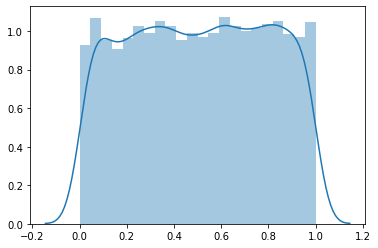

In [11]:
sns.distplot(cuped_metric)

График t-теста от обычной метрики:

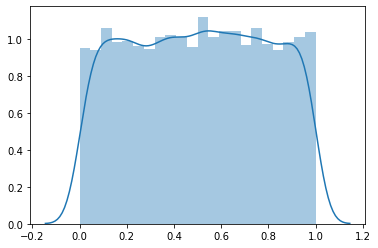

In [12]:
sns.distplot(usual_metric)

По графикам видно, что обе величины распределены равномерно — что говорит о том, что любое отклонение происходит равновероятно.


## Стратификация


В предыдущей теме рассмотрели пример исторической предрасположенности разных элементов выборки, которые отличаются друг от друга и тем самым формируют дисперсию.

В данной теме рассмотрим случай, когда различие разных элементов выборки определяется тем, что они принадлежат различным логически объяснимым сегментам:
- Разные географичекие регионы
- Сегменты профессиональных и частных пользователей
- Логические категории контента

> 👉 **Стратификация — это наиболее известный метод уменьшения дисперсии.** 

Основная **идея стратифицированной выборки** состоит в том, чтобы разделить совокупность на страты, выбрать выборку из каждой страты независимо, а затем объединить выборки для каждой страты для получения общей оценки.

> 📌 На страты мы разделяем заранее. Один элемент выборки однозначно принадлежит одной страте.

При стратифицированной выборке доля выборки из $k$-й страты фиксируется.

Доля каждой страты в общей выборке составляет $pk$.

**1) Вычислим среднее для стратифицированной выборки:**

$$Y_{11},...Y_{1n_1},...Y_{K1,...,}Y_{Kn_K}$$

**2) Посчитаем среднее (суммируем все элементы и делим на их количество):**
$$\overline Y=\frac1n\sum_{k=1}^K\sum_{j=1}^{n_k}Y_{kj}$$ 

**3) Стратифицированное среднее вычисляем как взвешенное среднее по стратам:**
$${\widehat Y}_{strat}=\sum_{k=1}^Kp_k\overline{Y_k}$$ 

👉 Можем наблюдать, что среднее для случайно разделённой выборки и страфицированной одинаково, но только при условии, что разделили по стратам всех пользователей:

$$\sum_{k=1}^Kp_k{\overline Y}_k=\sum_{k=1}^Kp_k\frac1{n_k}\sum_{j=1}^{n_k}Y_{kj}=\sum_{k=1}^K\frac{n_k}n\frac1{n_k}\sum_{j=1}^{n_k}Y_{kj}=\frac1n\sum_{k=1}^K\sum_{j=1}^{n_k}Y_{kj}$$

**4) Вычислим дисперсию для стратифицированной выборки и случайно разделённой(srs):** 

$$var_{strat}({\widehat Y}_{strat})=\sum_{k=1}^Kp_k^2var_{strat}({\widehat Y}_k)=\sum_{k=1}^K\frac{n_k^2}{n^2}\frac1{n_k}\sigma_k^2=\frac1n\sum_{k=1}^Kp_k\sigma_k^2$$

$$var_{srs}(\overline Y)=\frac1n\sum_{k=1}^Kp_k\sigma_k^2+\frac1n\sum_{k=1}^Kp_k{(\mu_k-\mu)}^2$$

👉 Можем наблюдать, что дисперсия среднего страфицированной выборки всегда меньше либо равна дисперсии для среднего случайно разделённой выборки:

$$var_{strat}({\widehat Y}_{strat})\leq var_{srs}(\overline Y)$$

📌 Если все группы одинаковые, то в выражении будет равенство, а если есть две разные, то будет знак меньше.


---

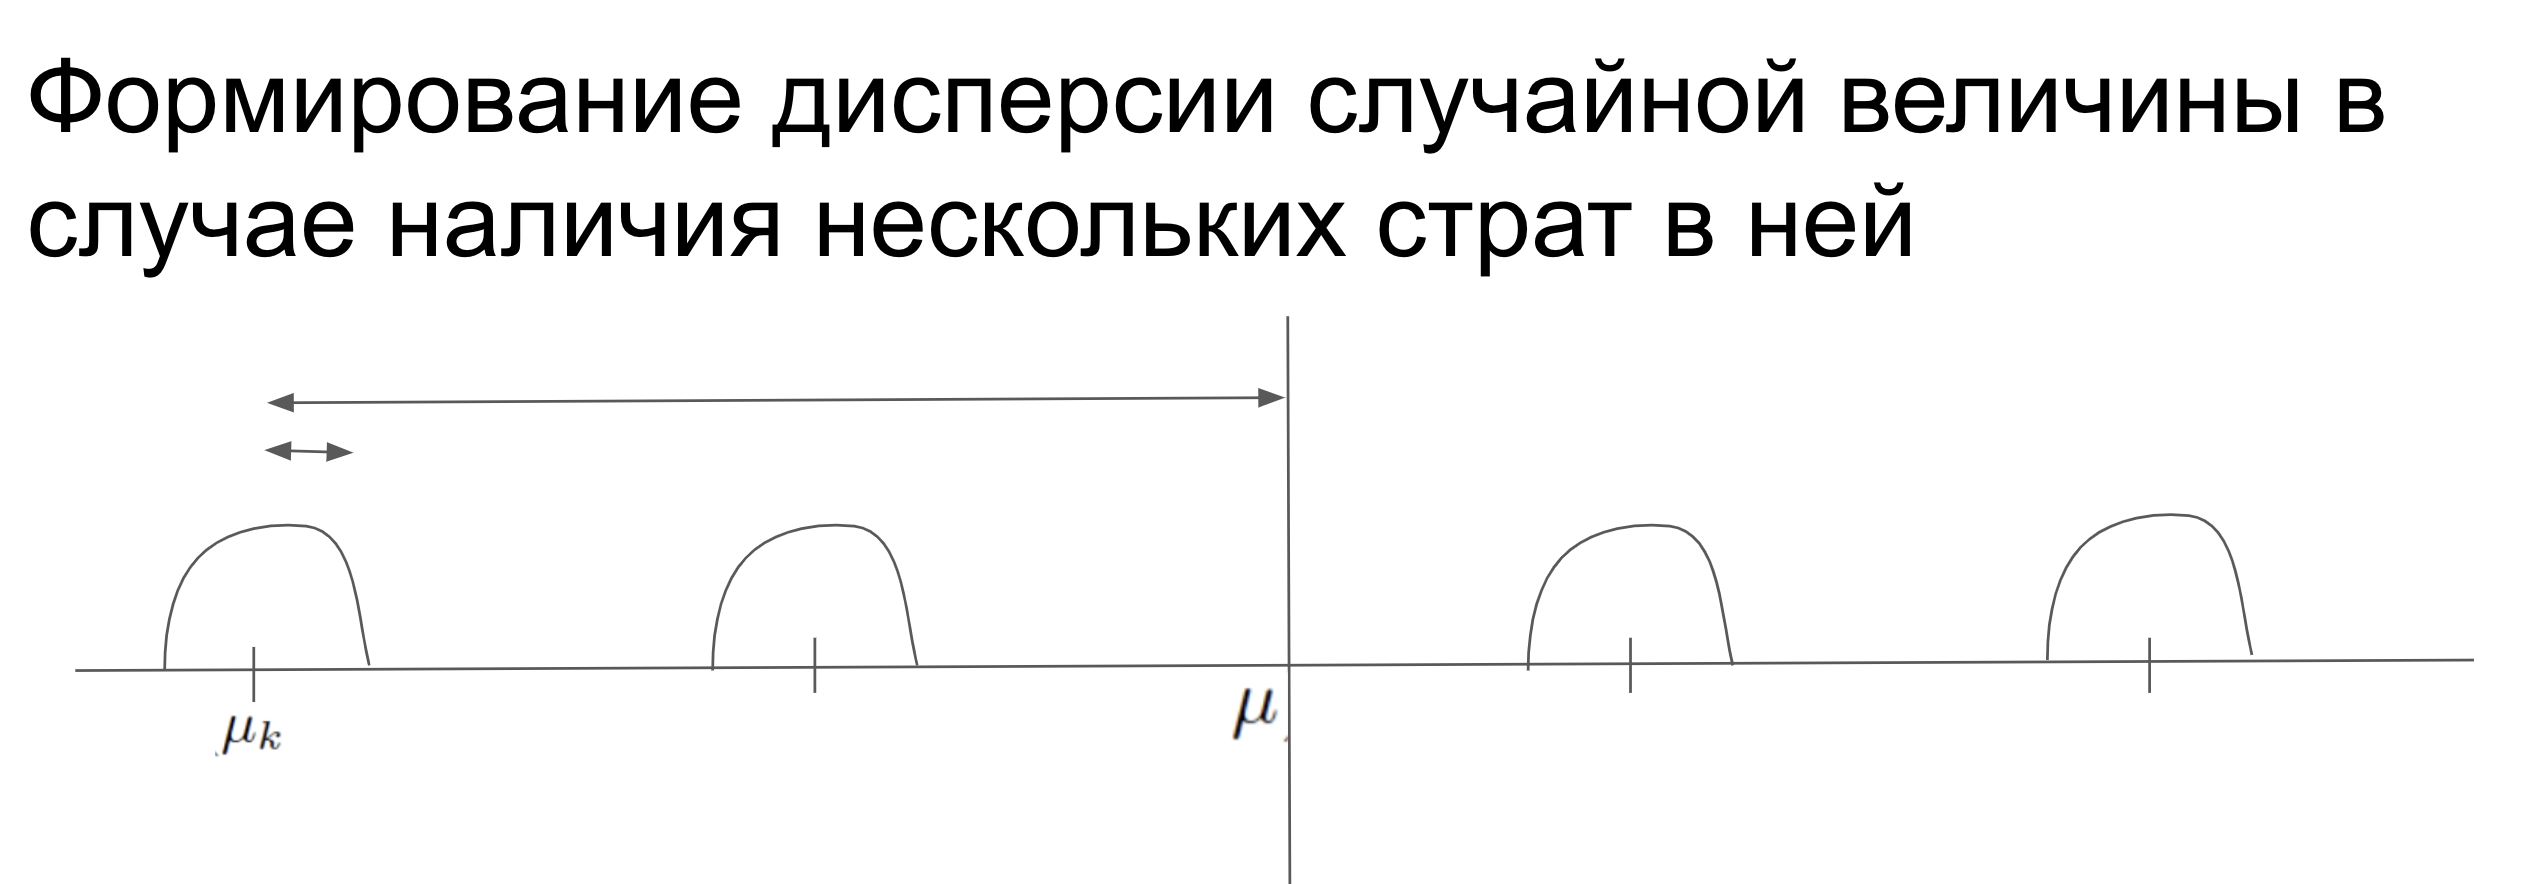

💬 На практике, далеко не всегда получается быстро найти сегменты, по которым мы можем разделить выборку на страты.
Но, с другой стороны, это формирует пространство для исследования и в некоторых случаях даёт единственную возможность провести эксперимент с приемлемым уровнем чувствительности.

Рассмотрим пример из реальной практики, где получилось значительно снизить уровень дисперсии при стратификации по сегментам частных и профессиональных пользователей.

In [34]:
data_test = pd.read_csv('stratification_in_test.csv')

Рассчитаем среднее выборки и стратифированной выборки. Можем наблюдать, что значения совпадают.

In [35]:
data_test.revenue.mean()

300996.00052777794

In [36]:
strata_p = data_test[['user_segment','revenue']].groupby(['user_segment']).count()/data_test.count()[0]
data_test=data_test.join(strata_p, on='user_segment', rsuffix='_probality')

In [37]:
(data_test.groupby(['user_segment']).mean().revenue*data_test.groupby(['user_segment']).mean().revenue_probality).sum()

300996.0005277777

Вычислим дисперсию среднего выборки и среднего стратифицированной выборки. Можем обнаружить, что величины дисперсий различаются на порядок.

In [38]:
data_test.revenue.var()/data_test.count()[0]

386544830.0164472

In [39]:
(data_test.groupby(['user_segment']).var().revenue*
 data_test.groupby(['user_segment']).mean().revenue_probality).sum()/data_test.count()[0]

31535846.28039062

Такое различие дисперсий обусловлено большой разницей между разными сегментами элементов выборки:

In [40]:
data_test[['user_segment','revenue']].groupby(['user_segment']).revenue.mean()

user_segment
ASD        1.634208e+06
Private    1.240045e+05
Pro        3.600076e+05
Name: revenue, dtype: float64

☝️ Видим, что дисперсия стала ниже, а среднее — то же. Поэтому чувствительность выросла.  
Далее мы можем применить t-тест, но вместо обычной дисперсии выборки взять дисперсию для стратифицированной выборки.

В случае, если в некоторых стратах выигрывает тест, а в некоторых контроль, можно попробовать построить выводы для отдельных страт (если мы можем найти логическое объяснение, почему в одних есть изменение, а в других нет).


## Выводы

1) Дисперсию можно разделить на части, одну из которых можно логически объяснить, а другую — невозможно (погрешность, ошибка).  

2) Часть дисперсии, которую мы можем объяснить, можно снизить.  

3) Методики CUPED и стратификация, при успешном их применении, могут снижать дисперсию средних на порядок. При этом мат. аппарат этих методов обеспечивает валидность выводов.   

4) Применять стратификацию можно всегда. При этом если нет срезов, которые могут разделять элементы выборки, это применение будет неэффективным.